In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import yfinance as yf

# Define the ticker symbol for Google (GOOGL)
ticker = "GOOGL"

# Fetch the historical stock prices
data = yf.download(ticker, start="2010-01-01", end="2023-05-27")


[*********************100%***********************]  1 of 1 completed


In [4]:
# Save the data to a CSV file
data.to_csv("google_stock_prices.csv")


In [5]:
import pandas as pd
path="/content/google_stock_prices.csv" #replace with path
data = pd.read_csv(path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3373 non-null   object 
 1   Open       3373 non-null   float64
 2   High       3373 non-null   float64
 3   Low        3373 non-null   float64
 4   Close      3373 non-null   float64
 5   Adj Close  3373 non-null   float64
 6   Volume     3373 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.6+ KB


In [7]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3373 non-null   object 
 1   Open       3373 non-null   float64
 2   High       3373 non-null   float64
 3   Low        3373 non-null   float64
 4   Close      3373 non-null   float64
 5   Adj Close  3373 non-null   float64
 6   Volume     3373 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.6+ KB


In [9]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(3373, 1)

In [10]:
X_train = []
y_train = []
for i in range (60,1149): #60 : timestep // 1149 : length of the data
 X_train.append(trainData[i-60:i,0]) 
 y_train.append(trainData[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape


(1089, 60, 1)

In [12]:
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 20s - loss: 4.7180e-04 - 20s/epoch - 566ms/step
Epoch 2/20
35/35 - 10s - loss: 2.0763e-04 - 10s/epoch - 285ms/step
Epoch 3/20
35/35 - 11s - loss: 8.0927e-05 - 11s/epoch - 300ms/step
Epoch 4/20
35/35 - 9s - loss: 6.1161e-05 - 9s/epoch - 261ms/step
Epoch 5/20
35/35 - 7s - loss: 7.2266e-05 - 7s/epoch - 206ms/step
Epoch 6/20
35/35 - 9s - loss: 7.0860e-05 - 9s/epoch - 262ms/step
Epoch 7/20
35/35 - 8s - loss: 7.2080e-05 - 8s/epoch - 224ms/step
Epoch 8/20
35/35 - 9s - loss: 6.3436e-05 - 9s/epoch - 257ms/step
Epoch 9/20
35/35 - 9s - loss: 6.0094e-05 - 9s/epoch - 261ms/step
Epoch 10/20
35/35 - 8s - loss: 7.0260e-05 - 8s/epoch - 229ms/step
Epoch 11/20
35/35 - 9s - loss: 1.1083e-04 - 9s/epoch - 261ms/step
Epoch 12/20
35/35 - 7s - loss: 7.2887e-05 - 7s/epoch - 210ms/step
Epoch 13/20
35/35 - 9s - loss: 6.8014e-05 - 9s/epoch - 254ms/step
Epoch 14/20
35/35 - 9s - loss: 7.1004e-05 - 9s/epoch - 246ms/step
Epoch 15/20
35/35 - 8s - loss: 5.9618e-05 - 8s/epoch - 220ms/step
Epoch 16/20
3

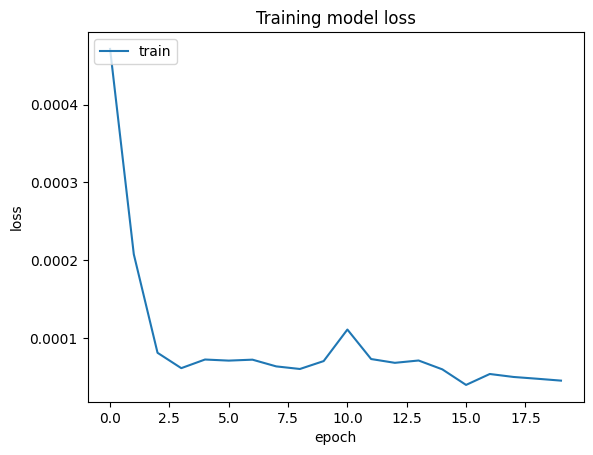

In [13]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [16]:
testData = pd.read_csv('/content/google_stock_prices.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): 
 X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(3313, 60, 1)

In [17]:
y_pred = model.predict(X_test)
import pandas as pd
df = pd.DataFrame(y_pred, columns = ['Predicted stock Value'])
print(df)

104/104 [==============================] - 10s 72ms/step
      Predicted stock Value
0                  0.021513
1                  0.021392
2                  0.021383
3                  0.021480
4                  0.021655
...                     ...
3308               0.642442
3309               0.652171
3310               0.661317
3311               0.669214
3312               0.675636

[3313 rows x 1 columns]


In [18]:
predicted_price = sc.inverse_transform(y_pred)

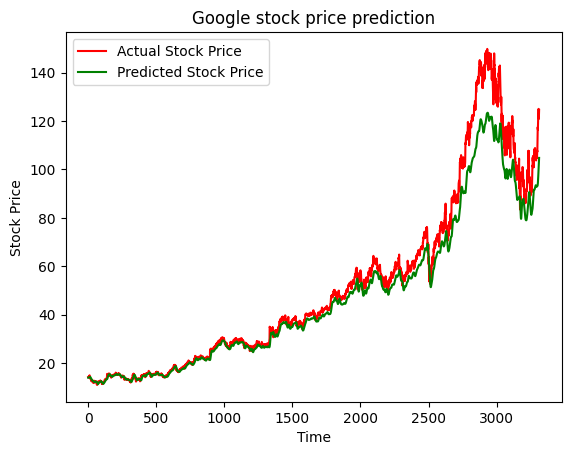

In [19]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()